In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
CDL = pd.read_csv('/Users/macbook/Library/CloudStorage/OneDrive-TheOhioStateUniversity/NLCD and CDL data/CDL_County_Cellwise_55141.csv')
NLCD = pd.read_csv('/Users/macbook/Library/CloudStorage/OneDrive-TheOhioStateUniversity/NLCD and CDL data/NLCD_County_Cellwise_SpatialJoin_55141.csv')

/var/folders/hs/y116vr4j4yg5fcthw_l99c5r0000gn/T/ipykernel_1038/3787423957.py:2: DtypeWarning: Columns (25,26,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  NLCD = pd.read_csv('/Users/macbook/Library/CloudStorage/OneDrive-TheOhioStateUniversity/NLCD and CDL data/NLCD_County_Cellwise_SpatialJoin_55141.csv')


In [3]:
# choosing 20000 rows from each dataset
CDL = CDL.sample(n=20000)
NLCD = NLCD.sample(n=20000)

# NLCD

In [4]:
NLCD.head()

,cell,GEOID,CSAFP,CBSAFP,LU_2001,LU_2004,LU_2006,LU_2008,LU_2011,LU_2013,...,MaxTexture,x,y,Slope_Degrees,FIPS_UA00,Name_UA00,Type_UA00,FIPS_UA10,Name_UA10,Type_UA10
1041701,152987681.0,55141,554,49220,Wetlands,Wetlands,Wetlands,Wetlands,Wetlands,Wetlands,...,fine-loamy over sandy or sandy-skeletal,465630.0,2398020.0,0.007416,NaN,NaN,NaN,NaN,NaN,NaN
1279332,155479652.0,55141,554,49220,Wetlands,Wetlands,Wetlands,Wetlands,Wetlands,Wetlands,...,fine-loamy,466680.0,2421120.0,0.009125,NaN,NaN,NaN,NaN,NaN,NaN
454264,146213477.0,55141,554,49220,Cropland,Cropland,Cropland,Cropland,Cropland,Cropland,...,fine-loamy,476310.0,2377380.0,0.020910,NaN,NaN,NaN,NaN,NaN,NaN
1547298,158307645.0,55141,554,49220,Forest,Forest,Forest,Forest,Forest,Forest,...,not used,495450.0,2400090.0,0.002312,NaN,NaN,NaN,NaN,NaN,NaN
637831,148577712.0,55141,554,49220,Wetlands,Wetlands,Wetlands,Wetlands,Wetlands,Wetlands,...,fine-loamy over sandy or sandy-skeletal,468000.0,2401380.0,0.017901,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
NLCD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1041701 to 439703
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cell           20000 non-null  float64
 1   GEOID          20000 non-null  int64  
 2   CSAFP          20000 non-null  int64  
 3   CBSAFP         20000 non-null  int64  
 4   LU_2001        20000 non-null  object 
 5   LU_2004        20000 non-null  object 
 6   LU_2006        20000 non-null  object 
 7   LU_2008        20000 non-null  object 
 8   LU_2011        20000 non-null  object 
 9   LU_2013        20000 non-null  object 
 10  LU_2016        20000 non-null  object 
 11  LU_2019        20000 non-null  object 
 12  FIPS_cnty      20000 non-null  int64  
 13  FIPS_csa18     20000 non-null  int64  
 14  FIPS_cbsa18    20000 non-null  int64  
 15  AREASYMBOL     20000 non-null  object 
 16  SPATIALVER     20000 non-null  int64  
 17  MUSYM          20000 non-null  object 
 18 

In [6]:
print(NLCD['LU_2006'].unique())

['Wetlands' 'Cropland' 'Forest' 'Developed' 'Pasture' 'Other']


# CDL


In [7]:
CDL.head()

,cell,x,y,GEOID,LU_2008,LU_2009,LU_2010,LU_2011,LU_2012,LU_2013,...,LU_2009_DRFEWS,LU_2010_DRFEWS,LU_2011_DRFEWS,LU_2012_DRFEWS,LU_2013_DRFEWS,LU_2014_DRFEWS,LU_2015_DRFEWS,LU_2016_DRFEWS,LU_2017_DRFEWS,LU_2018_DRFEWS
827379,150734983.0,481500,2405790,55141,Deciduous Forest,Grassland/Pasture,Grassland/Pasture,Evergreen Forest,Deciduous Forest,Grassland/Pasture,...,Pasture,Pasture,Forest,Forest,Pasture,Forest,Forest,Wetlands,Forest,Forest
979113,152284976.0,488220,2402880,55141,Alfalfa,Corn,Corn,Soybeans,Alfalfa,Alfalfa,...,Cropland,Cropland,Cropland,Pasture,Pasture,Pasture,Pasture,Pasture,Pasture,Pasture
322435,144487936.0,480300,2417520,55141,Alfalfa,Alfalfa,Grassland/Pasture,Corn,Corn,Corn,...,Pasture,Pasture,Cropland,Cropland,Cropland,Pasture,Cropland,Cropland,Pasture,Cropland
1213917,154681736.0,494520,2398380,55141,Grassland/Pasture,Grassland/Pasture,Grassland/Pasture,Alfalfa,Grassland/Pasture,Grassland/Pasture,...,Pasture,Pasture,Pasture,Pasture,Pasture,Pasture,Wetlands,Pasture,Pasture,Cropland
1389607,156485805.0,454560,2394990,55141,Deciduous Forest,Deciduous Forest,Deciduous Forest,Deciduous Forest,Deciduous Forest,Deciduous Forest,...,Forest,Forest,Forest,Forest,Forest,Forest,Forest,Forest,Forest,Forest


In [8]:
not_needed = CDL.columns[15:]
CDL.drop(not_needed, axis=1, inplace=True)
CDL.drop(CDL.columns[:4], axis=1, inplace=True)
CDL.head()

,LU_2008,LU_2009,LU_2010,LU_2011,LU_2012,LU_2013,LU_2014,LU_2015,LU_2016,LU_2017,LU_2018
827379,Deciduous Forest,Grassland/Pasture,Grassland/Pasture,Evergreen Forest,Deciduous Forest,Grassland/Pasture,Evergreen Forest,Deciduous Forest,Woody Wetlands,Deciduous Forest,Deciduous Forest
979113,Alfalfa,Corn,Corn,Soybeans,Alfalfa,Alfalfa,Alfalfa,Alfalfa,Alfalfa,Alfalfa,Alfalfa
322435,Alfalfa,Alfalfa,Grassland/Pasture,Corn,Corn,Corn,Other Hay/Non Alfalfa,Soybeans,Corn,Alfalfa,Corn
1213917,Grassland/Pasture,Grassland/Pasture,Grassland/Pasture,Alfalfa,Grassland/Pasture,Grassland/Pasture,Other Hay/Non Alfalfa,Herbaceous Wetlands,Alfalfa,Fallow/Idle Cropland,Corn
1389607,Deciduous Forest,Deciduous Forest,Deciduous Forest,Deciduous Forest,Deciduous Forest,Deciduous Forest,Deciduous Forest,Deciduous Forest,Deciduous Forest,Deciduous Forest,Deciduous Forest


In [9]:
products = CDL['LU_2018'].unique()

In [10]:
print(CDL.shape)
print(NLCD.shape)

(20000, 11)
(20000, 30)


In [11]:
# count of each product in a given column of CDL
def count_products(df, col):
    count = {}
    for i in df[col]:
        if i in count:
            count[i] += 1
        else:
            count[i] = 1
    return count

print(count_products(CDL, 'LU_2012')['Corn'])
print(count_products(CDL, 'LU_2011')['Corn'])

corn_counts = CDL.eq('Corn').sum()
# add a new row to the data frame with the corn counts
CDL.loc['Corn Count'] = corn_counts
CDL.tail()
corn_prices_cal = [4.78, 3.81, 3.86, 5.96, 6.67, 6.23, 4.13, 3.67, 3.4, 3.3, 3.41]
corn_prices_mkt = [4.1, 3.59, 5.23, 6.2, 6.92, 4.49, 3.71, 3.52, 3.3, 3.31, 3.59]


2096
1878


[1982, 1714, 1652, 1878, 2096, 2088, 1682, 1939, 2028, 1809, 1787]


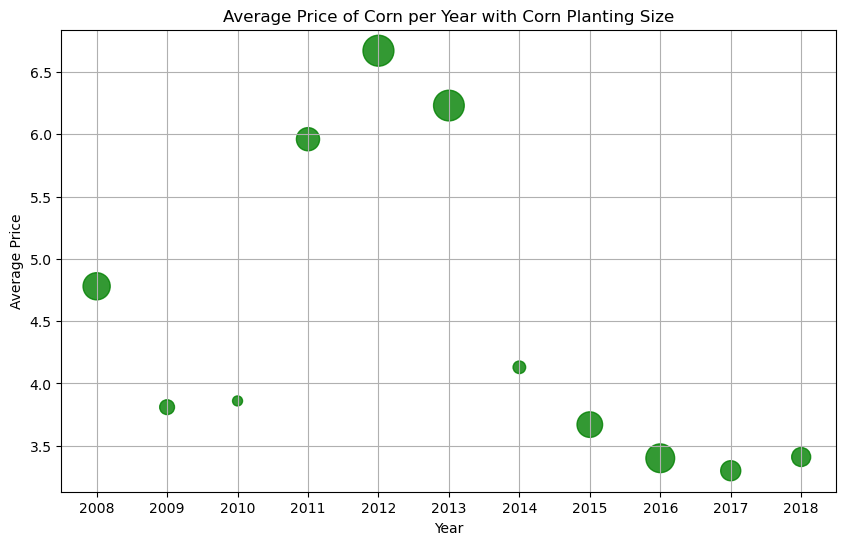

In [12]:
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
planted_corn = CDL.loc['Corn Count'].values.tolist()
print(planted_corn)
planted_corn = [x - 1600 for x in planted_corn]

plt.figure(figsize=(10, 6))
# plt.scatter(years, corn_prices_mkt, s=planted_corn, c='blue', alpha=0.8)
plt.scatter(years, corn_prices_cal, s=planted_corn, c='green', alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(years)
plt.title('Average Price of Corn per Year with Corn Planting Size')
plt.grid(True)
plt.show()

# Separating the rows that we see changes in plantings

In [13]:
# Initialize empty data frames to store similar and dissimilar rows
similar_df = pd.DataFrame()
dissimilar_df = pd.DataFrame()

# Loop through each row of the data frame
for index, row in CDL.iterrows():
    
    # Check if inputs in columns 4-14 are the same
    if row[4:15].nunique() == 1:
        # If they're the same, add the row to the similar data frame
        similar_df = pd.concat([similar_df, row.to_frame().transpose()])
    else:
        # If they're not the same, add the row to the dissimilar data frame
        dissimilar_df = pd.concat([dissimilar_df, row.to_frame().transpose()])

In [14]:
print(similar_df.shape)
print(dissimilar_df.shape)
dissimilar_df.head()

(7565, 11)
(12436, 11)


,LU_2008,LU_2009,LU_2010,LU_2011,LU_2012,LU_2013,LU_2014,LU_2015,LU_2016,LU_2017,LU_2018
827379,Deciduous Forest,Grassland/Pasture,Grassland/Pasture,Evergreen Forest,Deciduous Forest,Grassland/Pasture,Evergreen Forest,Deciduous Forest,Woody Wetlands,Deciduous Forest,Deciduous Forest
322435,Alfalfa,Alfalfa,Grassland/Pasture,Corn,Corn,Corn,Other Hay/Non Alfalfa,Soybeans,Corn,Alfalfa,Corn
1213917,Grassland/Pasture,Grassland/Pasture,Grassland/Pasture,Alfalfa,Grassland/Pasture,Grassland/Pasture,Other Hay/Non Alfalfa,Herbaceous Wetlands,Alfalfa,Fallow/Idle Cropland,Corn
384246,Soybeans,Corn,Soybeans,Corn,Soybeans,Alfalfa,Rye,Triticale,Corn,Soybeans,Corn
115851,Alfalfa,Alfalfa,Other Hay/Non Alfalfa,Soybeans,Alfalfa,Alfalfa,Grassland/Pasture,Alfalfa,Alfalfa,Corn,Corn


In [15]:
similar_df['LU_2011'].unique()

array(['Soybeans', 'Deciduous Forest', 'Woody Wetlands',
       'Developed/Open Space', 'Grassland/Pasture', 'Open Water',
       'Evergreen Forest', 'Developed/Low Intensity', 'Alfalfa',
       'Herbaceous Wetlands', 'Corn', 'Developed/High Intensity',
       'Developed/Med Intensity', 'Shrubland', 'Mixed Forest', 'Oats',
       'Fallow/Idle Cropland', 'Clover/Wildflowers', 'Onions',
       'Dry Beans', 'Winter Wheat'], dtype=object)

# Finding what we can have the year after every product

In [13]:
# Define a list to store the results for each product
product_results = []

# Loop through each product in the list
for product in products:

    # Identify which column has the current product entry
    product_col = None
    for col in dissimilar_df.columns:
        if product in dissimilar_df[col].unique():
            product_col = col
            break

    # If no entry for the current product is found, print an error message and skip to the next product
    if product_col is None:
        print(f"Error: no '{product}' entry found in dataframe.")
        continue

    # Find the column index of the column that comes after the current product entry
    product_col_idx = dissimilar_df.columns.get_loc(product_col)
    next_col_idx = product_col_idx + 1

    # If the current product entry is in the last column, print a message saying nothing can be planted the year after and skip to the next product
    if next_col_idx == len(dissimilar_df.columns):
        print(f"The '{product}' entry is in the last column. Nothing can be planted the year after.")
        continue

    # Otherwise, find the unique values that can be planted in the next year after the current product
    next_year_plantings = dissimilar_df.iloc[:, next_col_idx][dissimilar_df[product_col] == product].unique()

    # Store the results for the current product in the product_results list
    product_results.append((product, next_year_plantings))

# Print the results for each product
for product, next_year_plantings in product_results:
    print(f"The following can be planted in the year after '{product}':")
    for planting in next_year_plantings:
        print(planting)

The 'Squash' entry is in the last column. Nothing can be planted the year after.
The following can be planted in the year after 'Deciduous Forest':
Deciduous Forest
Woody Wetlands
Grassland/Pasture
Alfalfa
Evergreen Forest
Mixed Forest
Other Hay/Non Alfalfa
Herbaceous Wetlands
Shrubland
Open Water
Corn
Soybeans
Clover/Wildflowers
Christmas Trees
Oats
Potatoes
The following can be planted in the year after 'Evergreen Forest':
Evergreen Forest
Deciduous Forest
Mixed Forest
Herbaceous Wetlands
Woody Wetlands
Grassland/Pasture
Open Water
Dry Beans
The following can be planted in the year after 'Developed/Med Intensity':
Developed/Med Intensity
Developed/Low Intensity
Developed/High Intensity
Developed/Open Space
The following can be planted in the year after 'Herbaceous Wetlands':
Herbaceous Wetlands
Grassland/Pasture
Woody Wetlands
Deciduous Forest
Evergreen Forest
Open Water
Alfalfa
Soybeans
Winter Wheat
Shrubland
Corn
Other Hay/Non Alfalfa
Mixed Forest
The following can be planted in th

In [14]:
print(product_results[1])
np.shape(product_results)

('Evergreen Forest', array(['Evergreen Forest', 'Deciduous Forest', 'Mixed Forest',
       'Herbaceous Wetlands', 'Woody Wetlands', 'Grassland/Pasture',
       'Open Water', 'Dry Beans'], dtype=object))


/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(31, 2)

In [15]:
for i in range(0, np.shape(product_results)[0]):
    difference = np.setdiff1d(products, product_results[i][1])
    print('We cant have the following after', product_results[i][0])
    print(difference)
    print('\n')

We cant have the following after Deciduous Forest
['Barley' 'Barren' 'Cucumbers' 'Developed/High Intensity'
 'Developed/Low Intensity' 'Developed/Med Intensity'
 'Developed/Open Space' 'Dry Beans' 'Fallow/Idle Cropland' 'Herbs' 'Rye'
 'Sorghum' 'Spring Wheat' 'Squash' 'Sweet Potatoes' 'Winter Wheat']


We cant have the following after Evergreen Forest
['Alfalfa' 'Barley' 'Barren' 'Christmas Trees' 'Clover/Wildflowers' 'Corn'
 'Cucumbers' 'Developed/High Intensity' 'Developed/Low Intensity'
 'Developed/Med Intensity' 'Developed/Open Space' 'Fallow/Idle Cropland'
 'Herbs' 'Oats' 'Other Hay/Non Alfalfa' 'Potatoes' 'Rye' 'Shrubland'
 'Sorghum' 'Soybeans' 'Spring Wheat' 'Squash' 'Sweet Potatoes'
 'Winter Wheat']


We cant have the following after Developed/Med Intensity
['Alfalfa' 'Barley' 'Barren' 'Christmas Trees' 'Clover/Wildflowers' 'Corn'
 'Cucumbers' 'Deciduous Forest' 'Dry Beans' 'Evergreen Forest'
 'Fallow/Idle Cropland' 'Grassland/Pasture' 'Herbaceous Wetlands' 'Herbs'
 'Mixed Fore

# Finding out how many times changes occur in the same field (x, y)

### Non-unique:

In [16]:
# Define a function that counts the number of changes in a row
def count_changes(row):
    counter = 0
    for i in range(len(row)-1):
        if row[i] != row[i+1]:
            counter += 1
    return counter

# Apply the count_changes function to each row in the dataframe using the apply() method and store the results in a new column called 'changes'
dissimilar_df['changes'] = dissimilar_df.apply(count_changes, axis=1)

# Print the resulting dataframe
dissimilar_df.head()

,LU_2008,LU_2009,LU_2010,LU_2011,LU_2012,LU_2013,LU_2014,LU_2015,LU_2016,LU_2017,LU_2018,changes
267387,Alfalfa,Deciduous Forest,Deciduous Forest,Deciduous Forest,Deciduous Forest,Deciduous Forest,Woody Wetlands,Deciduous Forest,Deciduous Forest,Deciduous Forest,Herbaceous Wetlands,4
1910248,Open Water,Herbaceous Wetlands,Herbaceous Wetlands,Open Water,Open Water,Open Water,Herbaceous Wetlands,Open Water,Herbaceous Wetlands,Open Water,Herbaceous Wetlands,7
728981,Oats,Alfalfa,Alfalfa,Alfalfa,Alfalfa,Alfalfa,Corn,Corn,Corn,Fallow/Idle Cropland,Alfalfa,4
763903,Corn,Corn,Corn,Corn,Corn,Soybeans,Corn,Soybeans,Corn,Alfalfa,Soybeans,6
1927568,Woody Wetlands,Herbaceous Wetlands,Woody Wetlands,Woody Wetlands,Herbaceous Wetlands,Herbaceous Wetlands,Deciduous Forest,Deciduous Forest,Woody Wetlands,Deciduous Forest,Herbaceous Wetlands,7


In [17]:
print('In average, we see ' + str(np.mean(dissimilar_df['changes'])) + ' changes per row')

In average, we see 5.483467741935484 changes per row


### Unique:

In [18]:
# Define a function that counts the number of unique changes in a row
def count_unique_changes(row):
    changes = {}
    for i in range(len(row)-1):
        if row[i] != row[i+1]:
            pair = (row[i], row[i+1])
            if pair not in changes:
                changes[pair] = 1
    return len(changes)-1

# Apply the count_unique_changes function to each row in the dataframe using the apply() method and store the results in a new column called 'unique_changes_count'
dissimilar_df['unique_changes_count'] = dissimilar_df.apply(count_unique_changes, axis=1)

# Print the resulting dataframe
dissimilar_df.head()

,LU_2008,LU_2009,LU_2010,LU_2011,LU_2012,LU_2013,LU_2014,LU_2015,LU_2016,LU_2017,LU_2018,changes,unique_changes_count
267387,Alfalfa,Deciduous Forest,Deciduous Forest,Deciduous Forest,Deciduous Forest,Deciduous Forest,Woody Wetlands,Deciduous Forest,Deciduous Forest,Deciduous Forest,Herbaceous Wetlands,4,4
1910248,Open Water,Herbaceous Wetlands,Herbaceous Wetlands,Open Water,Open Water,Open Water,Herbaceous Wetlands,Open Water,Herbaceous Wetlands,Open Water,Herbaceous Wetlands,7,2
728981,Oats,Alfalfa,Alfalfa,Alfalfa,Alfalfa,Alfalfa,Corn,Corn,Corn,Fallow/Idle Cropland,Alfalfa,4,4
763903,Corn,Corn,Corn,Corn,Corn,Soybeans,Corn,Soybeans,Corn,Alfalfa,Soybeans,6,4
1927568,Woody Wetlands,Herbaceous Wetlands,Woody Wetlands,Woody Wetlands,Herbaceous Wetlands,Herbaceous Wetlands,Deciduous Forest,Deciduous Forest,Woody Wetlands,Deciduous Forest,Herbaceous Wetlands,7,6


In [19]:
print('In average, we see ' + str(np.mean(dissimilar_df['unique_changes_count'])) + ' unique changes per row')

In average, we see 4.249758064516129 unique changes per row


# Finding the changes between two consecutive years

In [20]:
# create a list of year columns
years = dissimilar_df.columns

# loop through the years
for i in range(len(years) - 1):
    # create a new data frame with just the fields for the current year and the next year
    current_year = years[i]
    next_year = years[i+1]
    df_year = dissimilar_df[[current_year, next_year]]

    # get the most frequent changes from the current year to the next year
    changes = df_year.groupby([current_year, next_year]).size().reset_index(name='count')
    changes = changes.sort_values(by='count', ascending=False)

    # store the results in a separate data frame
    df_changes = pd.DataFrame({'From': changes[current_year], 'To': changes[next_year], 'Count': changes['count']})

    # write the data frame to a CSV file
    filename = 'changes_{}_{}.csv'.format(current_year[-4:], next_year[-4:])
    df_changes.to_csv(filename, index=False)

In [39]:
# loop through the years
for i in range(len(years) - 3):
    # create a new data frame with just the fields for the current year and the next year
    current_year = years[i]
    next_year = years[i+1]
    df_year = dissimilar_df[[current_year, next_year]]

    # get the most frequent changes from the current year to the next year
    changes = df_year.groupby([current_year, next_year]).size().reset_index(name='count')
    changes = changes.sort_values(by='count', ascending=False)

    # store the results in a separate data frame
    df_changes = pd.DataFrame({'From': changes[current_year], 'To': changes[next_year], 'Count': changes['count']})

    # only keep rows where the "From" column is different from the "To" column
    df_changes = df_changes[df_changes['From'] != df_changes['To']]

    # print the resulting data frame
    print('Changes from {} to {}:'.format(current_year[-4:], next_year[-4:]))
    print(df_changes.head(2))
    print('\n')
    
# # read in the CSV file for the changes from 2008 to 2009
# df_changes = pd.read_csv('changes_2009_2010.csv')


# WHY WE SEE LOTS OF CORN->SOYBEANS AND SOYBEANS->CORN CHANGES:
# Compared to other crops, corn needs lots of nutrients, especially nitrogen. 
# This makes soybeans a good crop to alternate with corn, because soybeans have 
# nodules on their roots that host bacteria that fix atmospheric nitrogen.

Changes from 2008 to 2009:
               From                To  Count
226  Woody Wetlands  Deciduous Forest    513
48             Corn          Soybeans    424


Changes from 2009 to 2010:
               From                To  Count
50             Corn          Soybeans    517
264  Woody Wetlands  Deciduous Forest    429


Changes from 2010 to 2011:
                  From              To  Count
75    Deciduous Forest  Woody Wetlands    542
120  Grassland/Pasture         Alfalfa    487


Changes from 2011 to 2012:
       From                     To  Count
39     Corn               Soybeans    555
8   Alfalfa  Other Hay/Non Alfalfa    532


Changes from 2012 to 2013:
                 From                To  Count
89   Deciduous Forest    Woody Wetlands    504
245    Woody Wetlands  Deciduous Forest    473


Changes from 2013 to 2014:
                From              To  Count
49              Corn        Soybeans    484
82  Deciduous Forest  Woody Wetlands    447


Changes from 2014 t

In [31]:
# read in the CSV file for the changes from 2008 to 2009
df_changes = pd.read_csv('changes_2009_2010.csv')

print('changes from:')
for product in products:
    df_changes = pd.read_csv('changes_2009_2010.csv')
    # only keep rows where the "From" column is Corn
    df_changes = df_changes[df_changes['From'] != df_changes['To']]
    df_changes = df_changes[df_changes['From'] == product]

    # print the sum of the "Count" column
    print(str(product) + ': ' + str(df_changes['Count'].sum()))
print('\n\n')
print('changes to:')
for product in products:
    df_changes = pd.read_csv('changes_2009_2010.csv')
    # only keep rows where the "From" column is Corn
    df_changes = df_changes[df_changes['From'] != df_changes['To']]
    df_changes = df_changes[df_changes['To'] == product]

    # print the sum of the "Count" column
    print(str(product) + ': ' + str(df_changes['Count'].sum()))

12400
for Deciduous Forest: 1093
for Evergreen Forest: 218
for Developed/Med Intensity: 8
for Herbaceous Wetlands: 325
for Alfalfa: 1069
for Soybeans: 487
for Woody Wetlands: 583
for Developed/Open Space: 40
for Corn: 917
for Open Water: 57
for Other Hay/Non Alfalfa: 357
for Developed/Low Intensity: 36
for Grassland/Pasture: 1150
for Potatoes: 31
for Shrubland: 45
for Christmas Trees: 1
for Mixed Forest: 119
for Clover/Wildflowers: 23
for Winter Wheat: 84
for Fallow/Idle Cropland: 6
for Sorghum: 0
for Dry Beans: 32
for Developed/High Intensity: 0
for Barley: 20
for Oats: 122
for Barren: 2
for Herbs: 1
for Spring Wheat: 4
for Cucumbers: 1
for Rye: 1
for Sweet Potatoes: 0
for Squash: 0



for Deciduous Forest: 1077
for Evergreen Forest: 218
for Developed/Med Intensity: 6
for Herbaceous Wetlands: 538
for Alfalfa: 503
for Soybeans: 656
for Woody Wetlands: 549
for Developed/Open Space: 30
for Corn: 875
for Open Water: 30
for Other Hay/Non Alfalfa: 641
for Developed/Low Intensity: 28
for Gra

# Creating Costs datasets

## Corn

In [16]:
# creating a data frame with various costs of production for corn
LU_years = ['LU_2008', 'LU_2009', 'LU_2010', 'LU_2011', 'LU_2012', 'LU_2013', 'LU_2014', 'LU_2015', 'LU_2016', 'LU_2017', 'LU_2018']
costs = pd.DataFrame(columns=LU_years)
costs.loc['Seed'] = [2.12, 3.13, 3.44, 3.25, 3.40, 3.64, 3.78, 3.86, 3.70, 3.43, 3.26]
costs.loc['Nitrogen'] = [0.46, 0.68, 0.33, 0.51, 0.63, 0.58, 0.44, 0.47, 0.40, 0.31, 0.30]
costs.loc['Phosphorous'] = [0.50, 0.90, 0.38, 0.59, 0.64, 0.48, 0.43, 0.48, 0.45, 0.34, 0.39]
costs.loc['Potash'] = [0.27, 0.72, 0.43, 0.47, 0.55, 0.50, 0.41, 0.41, 0.35, 0.25, 0.27]
costs.loc['Diesel Fuel'] = [2.75, 2.50, 2.25, 2.80, 3.25, 3.25, 3.15, 2.70, 2.00, 2.49, 2.65]
costs.loc['LP Gas'] = [1.75, 1.90, 1.70, 2.40, 1.60, 1.60, 1.75, 1.60, 1.10, 0.95, 1.50]
costs.loc['Cropland Rent'] = [176, 183, 164, 214, 252, 270, 260, 246, 230, 219, 222]
costs

,LU_2008,LU_2009,LU_2010,LU_2011,LU_2012,LU_2013,LU_2014,LU_2015,LU_2016,LU_2017,LU_2018
Seed,2.12,3.13,3.44,3.25,3.40,3.64,3.78,3.86,3.70,3.43,3.26
Nitrogen,0.46,0.68,0.33,0.51,0.63,0.58,0.44,0.47,0.40,0.31,0.30
Phosphorous,0.50,0.90,0.38,0.59,0.64,0.48,0.43,0.48,0.45,0.34,0.39
Potash,0.27,0.72,0.43,0.47,0.55,0.50,0.41,0.41,0.35,0.25,0.27
Diesel Fuel,2.75,2.50,2.25,2.80,3.25,3.25,3.15,2.70,2.00,2.49,2.65
LP Gas,1.75,1.90,1.70,2.40,1.60,1.60,1.75,1.60,1.10,0.95,1.50
Cropland Rent,176.00,183.00,164.00,214.00,252.00,270.00,260.00,246.00,230.00,219.00,222.00


In [17]:
crops = ['Corn', 'Alfalfa', 'Soybeans',
       'Winter Wheat', 'Oats', 'Dry Beans', 'Potatoes', 
       'Fallow/Idle Cropland', 'Cucumbers', 'Barren', 'Rye',
         'Herbs', 'Sweet Potatoes', 'Barley', 'Peas', 'Carrots']

crops_df = CDL[CDL.isin(crops)]
crops_df = crops_df.fillna("Not Crops")
crops_df.head()

,LU_2008,LU_2009,LU_2010,LU_2011,LU_2012,LU_2013,LU_2014,LU_2015,LU_2016,LU_2017,LU_2018
827379,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops
979113,Alfalfa,Corn,Corn,Soybeans,Alfalfa,Alfalfa,Alfalfa,Alfalfa,Alfalfa,Alfalfa,Alfalfa
322435,Alfalfa,Alfalfa,Not Crops,Corn,Corn,Corn,Not Crops,Soybeans,Corn,Alfalfa,Corn
1213917,Not Crops,Not Crops,Not Crops,Alfalfa,Not Crops,Not Crops,Not Crops,Not Crops,Alfalfa,Fallow/Idle Cropland,Corn
1389607,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops


## Computing corn ratio and soybeans ratio (corn(soybeans) field count/all crops field count)

In [18]:
# Initialize an array to store the corn-to-crop ratio for each year
corn_ratio = []

# Loop through each year
for year in CDL.columns:
    # Filter the dataframe to include only the entries for the current year
    year_data = CDL[year]
    
    # Count the number of entries for each crop
    crop_counts = year_data.value_counts().to_dict()
    
    # Count the number of entries for 'Corn' and the total number of entries for all crops
    corn_count = crop_counts.get('Corn', 0)
    total_count = sum(crop_counts.get(crop, 0) for crop in crops)
    
    # Calculate the corn-to-crop ratio for the current year
    ratio = corn_count / total_count if total_count != 0 else 0
    
    # Append the ratio to the corn_ratio array
    corn_ratio.append(ratio)

# Convert the corn_ratio array to a numpy array
corn_ratio = np.array(corn_ratio)

# Print the corn-to-crop ratio array
print(corn_ratio)

[0.36340301 0.35427863 0.38134811 0.35662742 0.45614799 0.48066298
 0.39372659 0.39531091 0.40568114 0.3405497  0.34678828]


In [19]:
# Initialize an array to store the corn-to-crop ratio for each year
soybeans_ratio = []

# Loop through each year
for year in CDL.columns:
    # Filter the dataframe to include only the entries for the current year
    year_data = CDL[year]
    
    # Count the number of entries for each crop
    crop_counts = year_data.value_counts().to_dict()
    
    # Count the number of entries for 'Soybeans' and the total number of entries for all crops
    soybeans_count = crop_counts.get('Soybeans', 0)
    total_count = sum(crop_counts.get(crop, 0) for crop in crops)
    
    # Calculate the soybeans-to-crop ratio for the current year
    ratio = soybeans_count / total_count if total_count != 0 else 0
    
    # Append the ratio to the soybeans_ratio array
    soybeans_ratio.append(ratio)

# Convert the soybeans_ratio array to a numpy array
soybeans_ratio = np.array(soybeans_ratio)

# Print the soybeans-to-crop ratio array
print(soybeans_ratio)

[0.11862853 0.12897892 0.17336103 0.13900494 0.16735582 0.08540516
 0.18047753 0.14271152 0.13702741 0.16208584 0.20725791]


# Machine Learning

## First model (corn ratio)
Not really working as well as we want it to

In [20]:
df = costs.transpose()
df['Corn Ratio'] = corn_ratio
df['Soybeans Ratio'] = soybeans_ratio
df

,Seed,Nitrogen,Phosphorous,Potash,Diesel Fuel,LP Gas,Cropland Rent,Corn Ratio,Soybeans Ratio
LU_2008,2.12,0.46,0.50,0.27,2.75,1.75,176.0,0.363403,0.118629
LU_2009,3.13,0.68,0.90,0.72,2.50,1.90,183.0,0.354279,0.128979
LU_2010,3.44,0.33,0.38,0.43,2.25,1.70,164.0,0.381348,0.173361
LU_2011,3.25,0.51,0.59,0.47,2.80,2.40,214.0,0.356627,0.139005
LU_2012,3.40,0.63,0.64,0.55,3.25,1.60,252.0,0.456148,0.167356
LU_2013,3.64,0.58,0.48,0.50,3.25,1.60,270.0,0.480663,0.085405
LU_2014,3.78,0.44,0.43,0.41,3.15,1.75,260.0,0.393727,0.180478
LU_2015,3.86,0.47,0.48,0.41,2.70,1.60,246.0,0.395311,0.142712
LU_2016,3.70,0.40,0.45,0.35,2.00,1.10,230.0,0.405681,0.137027
LU_2017,3.43,0.31,0.34,0.25,2.49,0.95,219.0,0.340550,0.162086


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Prepare the data
X = df[['Seed', 'Nitrogen', 'Phosphorous', 'Potash', 'Diesel Fuel', 'LP Gas', 'Cropland Rent', 'Soybeans Ratio']]
y = df['Corn Ratio']

# Create lagged features for the two previous years
# X_lagged = pd.concat([X.shift(2), X.shift(1)], axis=1)
# y_lagged = y.shift(-1)
# print(X_lagged)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict 'Corn Ratio' for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared Score:', r2)


Mean Squared Error (MSE): 0.020766364256696306
Root Mean Squared Error (RMSE): 0.14410539287860225
R-squared Score: -5.372333240756569


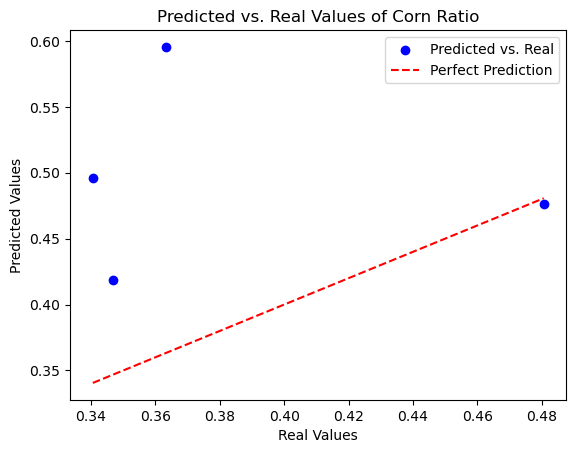

In [22]:
# Create a figure and axis
fig, ax = plt.subplots()

# Generate a line of equality
x_line = np.linspace(min(y_test), max(y_test), 100)
y_line = x_line

# Scatter plot of predicted vs real values
ax.scatter(y_test, y_pred, color='blue', label='Predicted vs. Real')
ax.plot(x_line, y_line, color='red', linestyle='--', label='Perfect Prediction')

# Set labels and title
ax.set_xlabel('Real Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Predicted vs. Real Values of Corn Ratio')

# Show legend
ax.legend()

# Show the plot
plt.show()

## First model using trends

Mean Squared Error (MSE): 0.012155368723755557
Root Mean Squared Error (RMSE): 0.11025138876111973
R-squared Score: -2.729976957669093


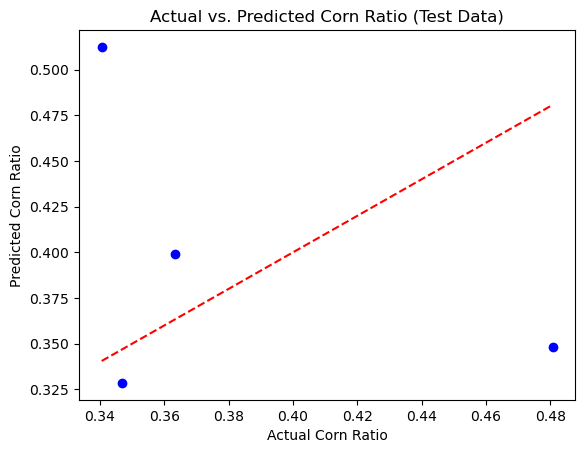

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame named 'df' with the required columns and data

# Calculate the annual percentage change for each cost column
df_pct_change = df.pct_change().fillna(0)

# Extract the price trend features from the percentage change DataFrame
price_trend = df_pct_change[['Seed', 'Nitrogen', 'Phosphorous', 'Potash', 'Diesel Fuel', 'LP Gas', 'Cropland Rent']]

# Define the target variable
target_variable = df['Corn Ratio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(price_trend, target_variable, test_size=0.3, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the corn ratios for the test data
predicted_ratio = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predicted_ratio)
rmse = mean_squared_error(y_test, predicted_ratio, squared=False)
r2 = r2_score(y_test, predicted_ratio)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score:", r2)

# Plotting
plt.figure()
plt.scatter(y_test, predicted_ratio, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Corn Ratio')
plt.ylabel('Predicted Corn Ratio')
plt.title('Actual vs. Predicted Corn Ratio (Test Data)')
plt.show()


## Second model 

In [24]:
crops = ['Corn', 'Alfalfa', 'Soybeans',
       'Winter Wheat', 'Oats', 'Dry Beans', 'Potatoes', 
       'Fallow/Idle Cropland', 'Cucumbers', 'Barren', 'Rye',
         'Herbs', 'Sweet Potatoes', 'Barley', 'Peas', 'Carrots']

crops_df = dissimilar_df[dissimilar_df.isin(crops)]
crops_df = crops_df.fillna("Not Crops")
crops_df = crops_df[:-1]
crops_df.tail()

,LU_2008,LU_2009,LU_2010,LU_2011,LU_2012,LU_2013,LU_2014,LU_2015,LU_2016,LU_2017,LU_2018
622940,Alfalfa,Alfalfa,Corn,Corn,Corn,Winter Wheat,Alfalfa,Alfalfa,Alfalfa,Alfalfa,Alfalfa
1189253,Not Crops,Not Crops,Alfalfa,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops
1133698,Winter Wheat,Oats,Not Crops,Alfalfa,Not Crops,Alfalfa,Not Crops,Not Crops,Not Crops,Not Crops,Corn
888178,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops,Not Crops
799189,Alfalfa,Alfalfa,Not Crops,Alfalfa,Alfalfa,Not Crops,Not Crops,Not Crops,Not Crops,Alfalfa,Alfalfa


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = crops_df

# Separate features (previous years' data) and target (next year's crop)
features = df.iloc[:, :-1]
target = df.iloc[:, -1]

# Apply label encoding to the target
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

# One-hot encode the features
features = pd.get_dummies(features)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define and train the machine learning model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Decode the predicted labels
y_pred = label_encoder.inverse_transform(y_pred)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0
